### Corner Dedection

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('chess.png')

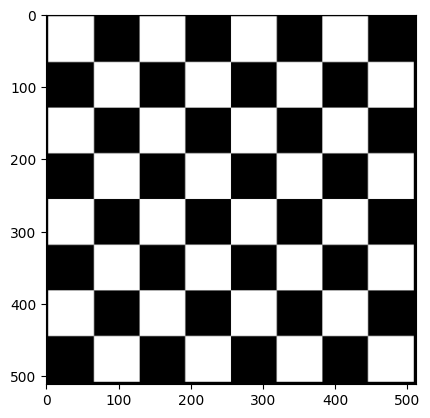

In [4]:
plt.imshow(image)

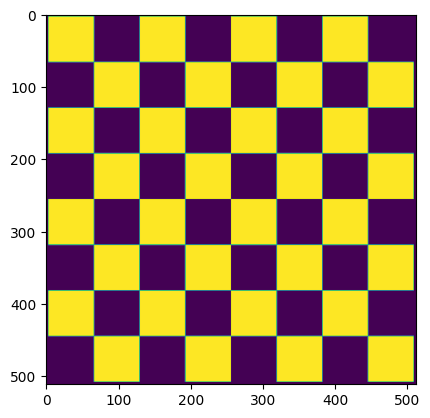

In [6]:
operatedImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(operatedImage)

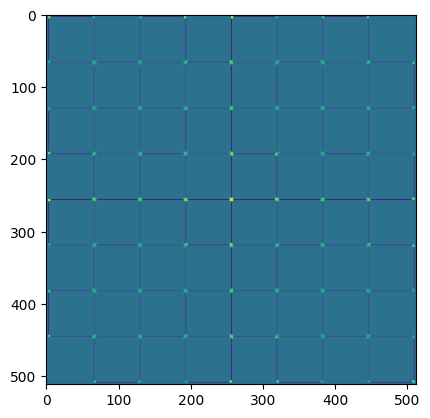

In [7]:
operatedImage = np.float32(operatedImage)
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)
dest = cv2.dilate(dest, None)
plt.imshow(dest)

In [8]:
image[dest > 0.01 * dest.max()] = [255, 0, 0]

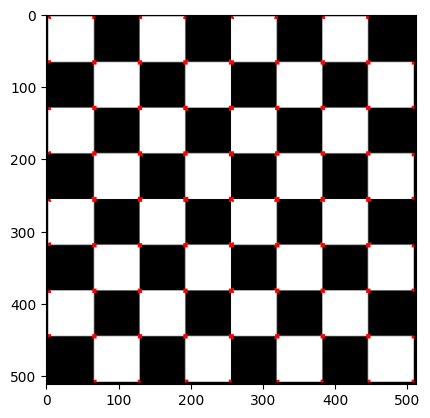

In [9]:
plt.imshow(image, cmap="gray")

###  Harris corner

```
IX2 = [[16 49 36]
[64 64 49]
[64 36 25]]

IY2 = [[16 64 64]
[64 36 49]
[36 36 16]]

IX * IY = [[16 56 48]
[32 48 49]
[48 36 20]]

R = det(M) - k*trace(M)^2

M = | IX2 IX * IY |
| IX * IY IY2 |


for (1,1)

M = [[16 56]
[56 64]]

det(M) = 1024 - 3136
= -2112

R = (-2112) - (0.04 * 80^2)
= -4672

for (1,2)
M = [[49 48]
[48 36]]

det(M) = -540
trace(M) = 85
R = -540-289 = -829

for (1,3)

M = [[36 20]
[30 16]]

det(M) = 176
trace(M) = 52

R = 76-108.16 = 67.84
```
### for (1,1) haris score is negative (in a flat)
### for (1,2) haris score is negative (in a flat)
### for (1,3) haris socre is positive (in a corner)

### Edge Dedection

In [11]:
edges = cv2.Canny(image=image,threshold1=127,threshold2=127) # below threshold1 -> weak edge, above threshold2 -> strong edge

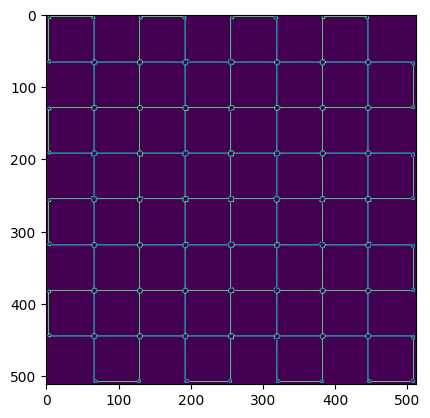

In [12]:
plt.imshow(edges)

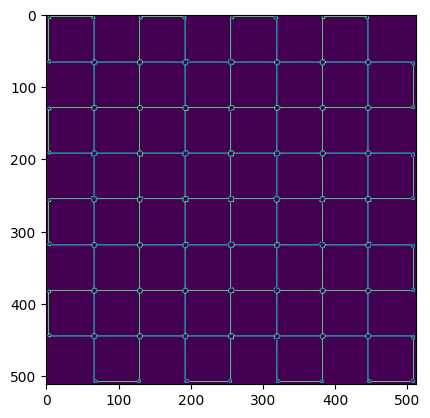

In [14]:
edges = cv2.Canny(image=image,threshold1=120,threshold2=180) # below threshold1 -> weak edge, above threshold2 -> strong edge
plt.imshow(edges)

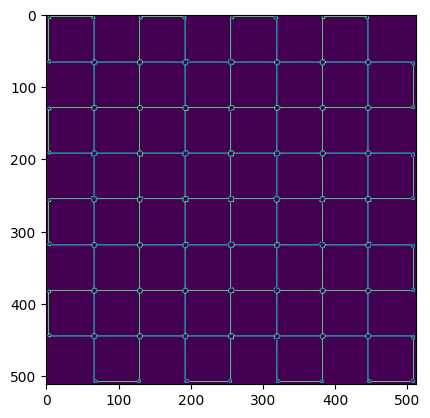

In [16]:
med_val = np.median(image)
lower = int(max(0,0.5*med_val))
upper = int(max(255,1*med_val))
edges = cv2.Canny(image,lower,upper)
plt.imshow(edges)

In [23]:
image = cv2.imread('chess.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
chessboard_size = (7, 7)

In [24]:
ret, corner = cv2.findChessboardCorners(gray, chessboard_size, None)

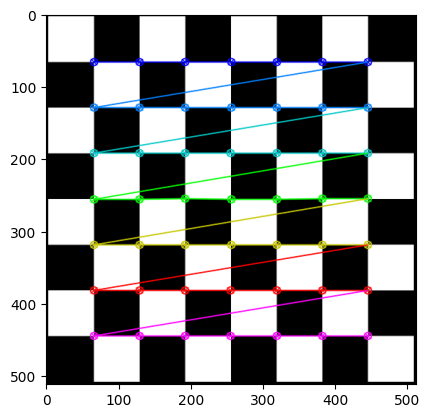

In [27]:
if ret:
    cv2.drawChessboardCorners(image, chessboard_size, corner, ret)
    plt.imshow(image)
else:
    print('There are no corners found on the chessboard')